In this work, we aim to develop a classification model that predicts abnormal test results based on various factors, such as age, sex, blood type, medical condition, and payment amount. Abnormal test results can be an important sign of medical diagnosis, and the ability to detect them early can lead to timely intervention. As healthcare becomes increasingly data-driven, building models that can reliably identify and predict such outcomes will play an important role in improving patient care and surgery will be improved

The dataset used in this study includes patient records, which have classification and statistical features, and the objective variable is test results: test results "normal" or "abnormal" Classification of these test results correct can greatly enhance decision-making in health care.

For the purpose of this research, I chose RandomForestClassifier as a group machine learning algorithm known for its accuracy and ability to handle large and complex datasets. The model was trained on the given data, and several analytical parameters were used to evaluate its performance, including accuracy, precision, recall and f1-score

In thisproject, we will evaluate the effectiveness of the model, analyze the results, and propose future improvements to better identify abnormal test results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

df=pd.read_csv("/kaggle/input/healthcareneww/healthcare_dataset.csv")
print(df)

                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1        

In [2]:
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [3]:
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [4]:
#Summary statistics of the numerical columns
print(df.describe())

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


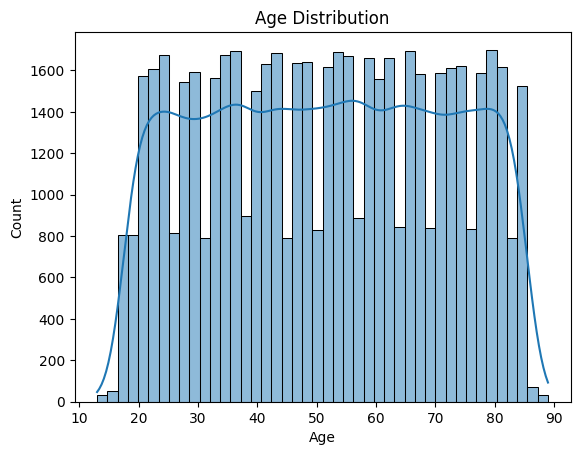

In [5]:
#age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

In [6]:
#correlation
z=df.corr(numeric_only=True)
print(z)

                     Age  Billing Amount  Room Number
Age             1.000000       -0.003832    -0.000720
Billing Amount -0.003832        1.000000    -0.002943
Room Number    -0.000720       -0.002943     1.000000


<Axes: >

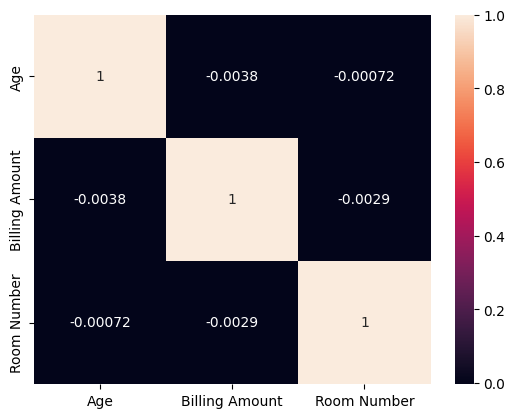

In [7]:
sns.heatmap(z,annot=True)

In [8]:
#label encoding=convert categorical variable to numeric
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Blood Type'] = df['Blood Type'].map({
    'A': 1, 'A+': 1, 'A-': 1,
    'B': 2, 'B+': 2, 'B-': 2,
    'O': 3, 'O+': 3, 'O-': 3,
    'AB': 4, 'AB+': 4, 'AB-': 4
})
df['Admission Type'] = df['Admission Type'].map({'Urgent': 0, 'Elective': 1, 'Emergency': 2})
df['Medical Condition'] = df['Medical Condition'].replace({
    'Cancer': 1,
    'Obesity': 2,
    'Diabetes': 3,
    'Asthma': 4,
    'Hypertension': 5,
    'Arthritis': 6,
    'Other': 0
}).astype(int)


In [9]:
print(df)

                    Name  Age  Gender  Blood Type  Medical Condition  \
0          Bobby JacksOn   30       1           2                  1   
1           LesLie TErRy   62       1           1                  2   
2            DaNnY sMitH   76       0           1                  2   
3           andrEw waTtS   28       0           3                  3   
4          adrIENNE bEll   43       0           4                  1   
...                  ...  ...     ...         ...                ...   
55495  eLIZABeTH jaCkSOn   42       0           3                  4   
55496         KYle pEREz   61       0           4                  2   
55497       HEATher WaNG   38       0           2                  5   
55498     JENniFER JOneS   43       1           3                  6   
55499       jAMES GARCiA   53       0           3                  6   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons

In [10]:
#train model
X = df[['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Billing Amount']] 
y = df['Test Results'].apply(lambda x: 1 if x == 'Abnormal' else 0) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44400, 5), (11100, 5), (44400,), (11100,))

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate on Test Data
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6110810810810811
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      7346
           1       0.39      0.26      0.31      3754

    accuracy                           0.61     11100
   macro avg       0.53      0.52      0.52     11100
weighted avg       0.58      0.61      0.59     11100



In this project, I used the RandomForestClassifier to create a classification model that predicted aberrant test results based on variables such as age, gender, blood type, medical condition, and billing amount. The model scored an overall accuracy of 61%, with strong performance in predicting normal test results (label 0), indicating that it is capable of identifying the majority class.
However, the model's performance in recognizing abnormal test results (label 1) was unsatisfactory, with a recall of 0.26 and a precision of 0.39, showing that it struggles to correctly identify less common abnormal cases. This is typical in real-world datasets when class imbalance exists, and while RandomForest is generally powerful, this difficulty is more tied to the distribution of the classes in the data than to the the choice of the model itself.